# 1. import Library

In [51]:
!pip install textblob

In [52]:
import pandas as pd 
import os
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import textract 
import docx2txt
import spacy
import docx
import string #special operation on string 
from matplotlib.pyplot import imread
from wordcloud  import WordCloud,STOPWORDS
import glob
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from textblob import TextBlob

In [39]:
os.chdir("E:/project 113/NEW_CVs")

Filename = []
Descriptions = []

for file in glob.glob('*.docx'):
    Descriptions.append(docx2txt.process(file))    
    Filename.append(file)
data = pd.DataFrame(
    {'Filename' :  Filename,
     'Descriptions': Descriptions
    })

In [40]:
data

,Filename,Descriptions
0,Anil kumar.docx,ANIL KUMAR MADDUKURI\n\n\n\nSQL & MSBI Develop...
1,AradhanaTripathi[4_0].docx,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...
2,Buddha Vamsi.docx,BUDDHA VAMSI\n\n\n\n\n\nCAREER OBJECTIVE:\n\n...
3,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\n\n\nDOB: 06th March 19...
4,Gopi Krishna_Hexaware.docx,Name\t: Gopi Krishna Reddy\n\n\n\n\n\n\n\n\n\n...
...,...,...
75,SSKumar_Hexaware.docx,WORKDAY | HCM | FCM\n\n\n\n\n\nName\n\nRole\n\...
76,Tatikonda Kiran Kumar.docx,Tatikonda Kiran Kumar.\n\n\n\n\n\n\n\n\n\nCare...
77,Venkateswarlu B_Hexaware.docx,Venkateswarlu.B\tWorkday Consultant\n\n\n\n\n\...
78,Vinay Kumar_Hexaware.docx,VINAY KUMAR .V\n\nWORKDAY FUNCTIONAL CONSULTAN...


In [23]:
cleaned_corpus = []
ps = PorterStemmer()

for i in range (0,len(data)):
     review = re.sub('[^A-Za-z]',' ', data['Descriptions'][i])  ## we did this to remove numbers in data set
     review = review.lower() # Convert the word in lower case 
     review = review.split() # it will help us to breakedown into individual words 
     review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
     review = ' '.join(review)
     cleaned_corpus.append(review)  

In [42]:
data['Cleaned_corpus'] = cleaned_corpus
data.head()

,Filename,Descriptions,Cleaned_corpus
0,Anil kumar.docx,ANIL KUMAR MADDUKURI\n\n\n\nSQL & MSBI Develop...,anil kumar maddukuri sql msbi develop summari ...
1,AradhanaTripathi[4_0].docx,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,aradhana tripathi current locat gachibowli hyd...
2,Buddha Vamsi.docx,BUDDHA VAMSI\n\n\n\n\n\nCAREER OBJECTIVE:\n\n...,buddha vamsi career object year experi databas...
3,ChinnaSubbarayuduM_Hexaware.docx,Chinna Subbarayudu M\n\n\n\nDOB: 06th March 19...,chinna subbarayudu dob th march nation indian ...
4,Gopi Krishna_Hexaware.docx,Name\t: Gopi Krishna Reddy\n\n\n\n\n\n\n\n\n\n...,name gopi krishna reddi profession summeri wor...


In [46]:
sentences = []
for i in range(len(data)):
    sentences.append(sent_tokenize(data['Cleaned_corpus'][i]))

sentences = np.array(str(sentences)).reshape(-1,1)
#Creating a Dataframe of the List Created
sentence_df = pd.DataFrame(sentences, columns = ['Cleaned_corpus'])

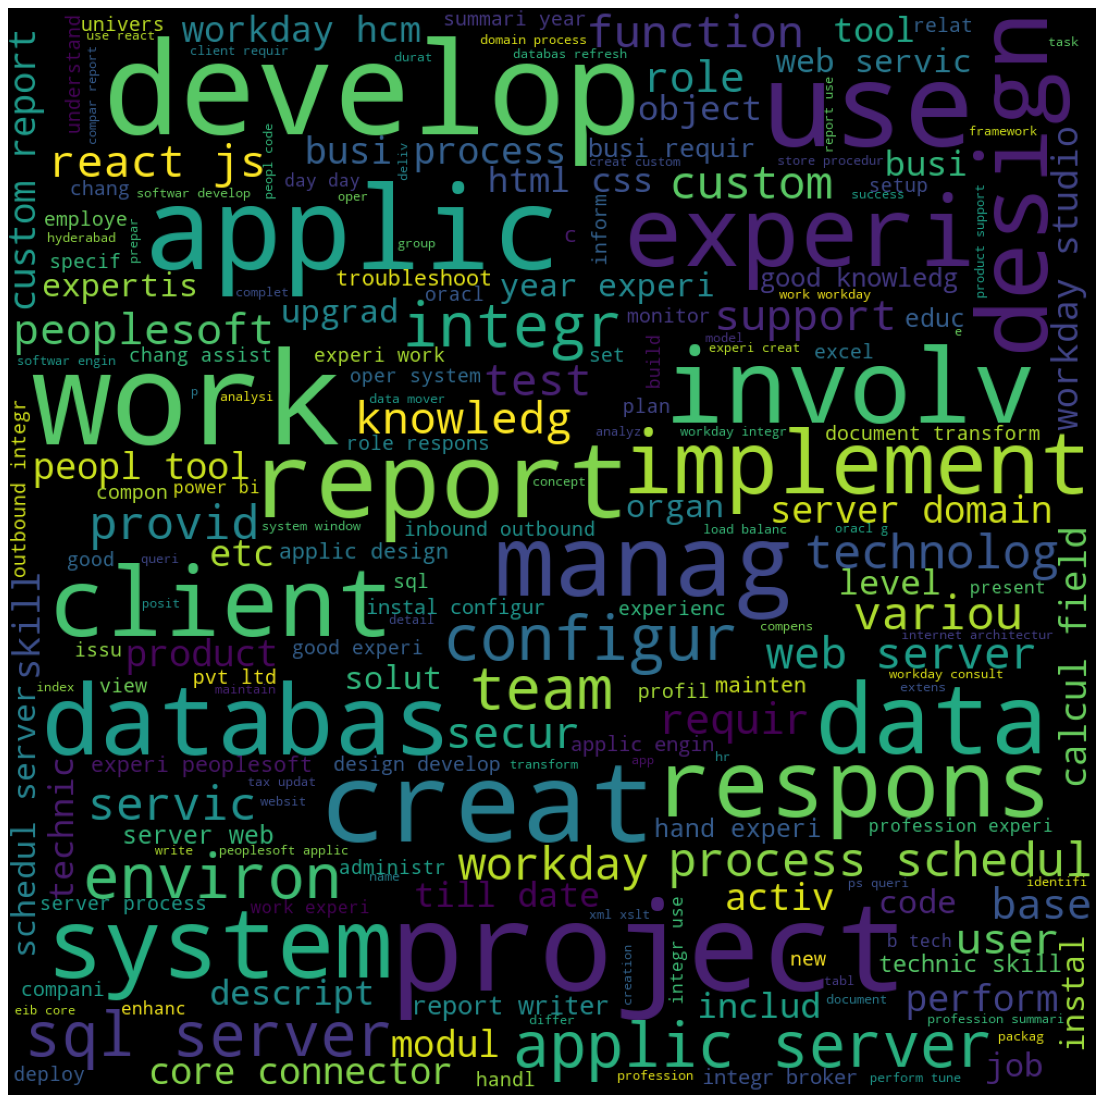

In [47]:
allwords = " ".join([txt for txt in sentence_df["Cleaned_corpus"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(18, 18), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [55]:
#Creating Required Columns For Analysis
data['polarity'] = data['Cleaned_corpus'].map(lambda data: TextBlob(cleaned_corpus).sentiment.polarity) #Gives a Sentiment Score
data['Clean_len'] = data['Cleaned_corpus'].astype(str).apply(len) #Gives the len of the Text
data['word_count'] = data['Cleaned_corpus'].apply(lambda x: len(str(x).split())) #Gives the Word Count of Text
data.head()

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'list'>